In [1]:
import pandas as pd
import numpy as np

# 통계
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency
from scipy.stats import ttest_1samp
from scipy.stats import ttest_rel
from scipy.stats import ttest_ind
from scipy.stats import bartlett
from scipy.stats import f_oneway
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
# 분류
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# 수치
from sklearn.metrics import mean_absolute_error # MAE
from sklearn.metrics import mean_squared_error # MSE

# 머신러닝
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import AgglomerativeClustering
from statsmodels.formula.api import ols # 선형회귀
from sklearn.linear_model import LinearRegression  # 선형회귀
from statsmodels.api import Logit # 로지스틱 회귀
from sklearn.metrics import roc_auc_score # AUC
from sklearn.tree import DecisionTreeClassifier

In [3]:
point_A = pd.Series([1, 3, 5, 7, 4])
point_B = pd.Series([2, 3, 7, 2, 1])

In [20]:
df_point = pd.DataFrame({"A": point_A, "B": point_B})
df_point

A  B
0  1  2
1  3  3
2  5  7
3  7  2
4  4  1

In [25]:
sum((df_point["B"] - df_point["A"]) ** 2) ** 0.5

6.244997998398398

In [ ]:
df_pro = pd.DataFrame([point_A, point_B])
df_pro.columns = ["car", "school", "house", "exp", "bank"]
df_pro

In [26]:
df_pro_t = df_pro.transpose()
sum((df_pro_t[0] - df_pro_t[1]) ** 2) ** 0.5

6.244997998398398

In [36]:
point_A = pd.Series([1, 3, 5, 7, 3000])
point_B = pd.Series([20, -2, 7, 2, 2000])
df_point = pd.DataFrame({"A": point_A, "B": point_B})
sum((df_point["A"] - df_point["B"]) ** 2) ** 0.5

1000.207478476341

In [37]:
from sklearn.datasets import make_moons

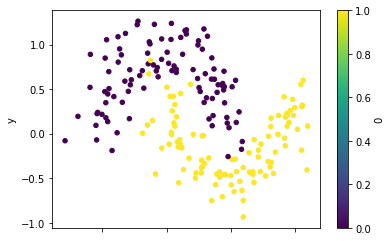

In [50]:
X, Y = make_moons(n_samples = 200, noise = 0.2, random_state = 123)
df_moon = pd.concat([pd.DataFrame(X, columns = ["x", "y"]),
                     pd.Series(Y)], axis = 1)
df_moon.plot.scatter(x = "x", y = "y", c = 0, colormap = "viridis")

In [ ]:
df_moon = df_moon.rename(columns = {0: "target"})
df_moon.plot.scatter(x = "x", y = "y", c = "target", colormap = "viridis")

In [ ]:
df_moon.head()

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [67]:
df_train, df_test = train_test_split(df_moon, test_size = 0.3,
                                     random_state = 100)

In [68]:
model = KNeighborsClassifier(n_neighbors = 5)
model.fit(X = df_train.drop("target", axis = 1), 
          y = df_train["target"])
model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [69]:
y_pred = model.predict(df_test.drop("target", axis = 1))
accuracy_score(y_pred, df_test["target"])

0.9833333333333333

In [70]:
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans

In [74]:
df = pd.read_excel("iris_xlsx.xlsx")
# X = df.loc[:, :"Petal.Width"]
X = df.drop("Species", axis = 1)
X.head(2)

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2

In [76]:
kmeans = KMeans(n_clusters = 3).fit(X)

In [79]:
centroids = pd.DataFrame(kmeans.cluster_centers_,
                         columns = X.columns)
centroids

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
0      5.901613     2.748387      4.393548     1.433871
1      5.006000     3.428000      1.462000     0.246000
2      6.850000     3.073684      5.742105     2.071053

In [96]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [82]:
X["cluster"] = kmeans.labels_

In [83]:
X.head()

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width  cluster
0           5.1          3.5           1.4          0.2        1
1           4.9          3.0           1.4          0.2        1
2           4.7          3.2           1.3          0.2        1
3           4.6          3.1           1.5          0.2        1
4           5.0          3.6           1.4          0.2        1

In [88]:
pd.crosstab(df["Species"], kmeans.labels_)

col_0        0   1   2
Species               
setosa       0  50   0
versicolor  48   0   2
virginica   14   0  36

In [94]:
confusion_matrix(kmeans.labels_, kmeans.labels_)

array([[62,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 38]], dtype=int64)

In [97]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt

In [100]:
df = pd.read_excel("iris_xlsx.xlsx")
X = df.drop("Species", axis = 1)
linked = linkage(X, "ward")

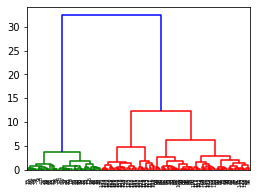

In [101]:
plt.figure(figsize = (4, 3))
dendrogram(linked)
plt.show()

In [103]:
cluster = AgglomerativeClustering(n_clusters = 3, affinity = "euclidean",
                                  linkage = "ward")
cluster.fit_predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

In [105]:
from sklearn.cluster import AgglomerativeClustering
df = pd.read_excel("iris_xlsx.xlsx")
X = df.drop("Species", axis = 1)
cluster = AgglomerativeClustering(n_clusters = 3, affinity = "euclidean",
                                  linkage = "ward")
pred = cluster.fit_predict(X)
pd.crosstab(df["Species"], pred)

col_0        0   1   2
Species               
setosa       0  50   0
versicolor  49   0   1
virginica   15   0  35

In [106]:
bike = pd.read_csv("bike.csv")
bike.head(1)

datetime  season  holiday  workingday  weather  ...  humidity  windspeed  casual  registered  count
0  2011-01-01 00:00:00       1        0           0        1  ...        81        0.0       3          13     16

[1 rows x 12 columns]

### Q1. holiday, workingday, weather, temp, humidity 를 독립변수로 하고, registered 변수를 종속변수로 하여 다중 선형회귀를 실시하고 결정계수 값을 반올림하여 소수점 셋째자리 까지 표기하시오.

In [108]:
from statsmodels.formula.api import ols
formula = "registered ~ holiday + workingday + weather + temp + humidity"
model = ols(formula, data = bike)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             registered   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     456.2
Date:                Thu, 17 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:40:34   Log-Likelihood:                -69031.
No. Observations:               10886   AIC:                         1.381e+05
Df Residuals:                   10880   BIC:                         1.381e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    132.2015      6.263     21.109      0.000     119.926     144.477
holiday        6.2204      8.163      0.762      0.446      -9.781      22.222
workingday    35.4481      2.921     12.134      0.000      29.722      41.175
weather        0.8437      2.276      0.371      0.711      -3.618       5.306
temp           5.8056      0.169     34.251      0.000       5.473       6.138
humidity      -1.9328      0.075    -25.779      0.000      -2.080      -1.786
==============================================================================
Omnibus:                     3078.756   Durbin-Watson:                   0.487
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8290.319
Skew:                           1.518   Prob(JB):                         0.00
Kurtosis:                       6.009   Cond. No.                         426.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [111]:
round(result.rsquared, 3)

0.173

In [113]:
result.pvalues

Intercept      5.641360e-97
holiday        4.460731e-01
workingday     1.150321e-33
weather        7.109184e-01
temp          2.891880e-244
humidity      2.676862e-142
dtype: float64

### Q2. 출퇴근 시간을 뜻하는 rush_hour 변수를 추가하여 다중 선형회귀분석을 실시하고 기존 모델 대비 결정계수의 증감분을 반올림하여 소수점 첫 째 자리 까지 기술하고, rush_hour 변수의 유의성 여부를 O 또는 X로 쓰시오.
(예, 12.3, X)

In [ ]:
bike["datetime"] = pd.to_datetime(bike["datetime"])
bike["hour"] = bike["datetime"].dt.hour
bike["rush_hour"] = bike["hour"].isin([7, 8, 9, 17, 18, 19]) + 0
bike.head(2)

In [122]:
formula = "registered ~ holiday + workingday + weather + temp + humidity + rush_hour"
model = ols(formula, data = bike)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             registered   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     1469.
Date:                Thu, 17 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:45:51   Log-Likelihood:                -66837.
No. Observations:               10886   AIC:                         1.337e+05
Df Residuals:                   10879   BIC:                         1.337e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     83.7112      5.162     16.216      0.000      73.592      93.830
holiday        6.1981      6.673      0.929      0.353      -6.883      19.279
workingday    35.5473      2.388     14.884      0.000      30.866      40.229
weather       -3.1382      1.862     -1.686      0.092      -6.788       0.511
temp           5.7655      0.139     41.608      0.000       5.494       6.037
humidity      -1.7864      0.061    -29.131      0.000      -1.907      -1.666
rush_hour    182.5242      2.484     73.487      0.000     177.656     187.393
==============================================================================
Omnibus:                     1522.306   Durbin-Watson:                   0.654
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2799.976
Skew:                           0.901   Prob(JB):                         0.00
Kurtosis:                       4.711   Cond. No.                         426.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [141]:
summ = result.summary()

In [170]:
pd.DataFrame(summ.tables[1].data)

0           1          2          3       4          5          6
0                    coef    std err          t   P>|t|     [0.025     0.975]
1   Intercept     83.7112      5.162     16.216   0.000     73.592     93.830
2     holiday      6.1981      6.673      0.929   0.353     -6.883     19.279
3  workingday     35.5473      2.388     14.884   0.000     30.866     40.229
4     weather     -3.1382      1.862     -1.686   0.092     -6.788      0.511
5        temp      5.7655      0.139     41.608   0.000      5.494      6.037
6    humidity     -1.7864      0.061    -29.131   0.000     -1.907     -1.666
7   rush_hour    182.5242      2.484     73.487   0.000    177.656    187.393

In [ ]:
formula = "registered ~ holiday + workingday + weather + temp + humidity + rush_hour"

In [174]:
"registered ~ " + " + ".join(bike.columns[3:8])

'registered ~ workingday + weather + temp + atemp + humidity'

In [ ]:
# result.predict()

### Q3. 공휴일, 날씨 맑음(1), 기온 20도, 상대습도 60, 저녁 6시의 경우 자전거 대여가 얼마나 될지 알아보시오.

In [175]:
df_pred = pd.DataFrame([[1, 0, 1, 20, 60, 1]],
                       columns = ["holiday", "workingday", "weather",
                                  "temp", "humidity", "rush_hour"])
df_pred

holiday  workingday  weather  temp  humidity  rush_hour
0        1           0        1    20        60          1

In [176]:
result.predict(df_pred)

0    277.422304
dtype: float64

In [177]:
from sklearn.linear_model import LinearRegression

In [179]:
bike_X = bike.loc[:, ["workingday", "temp", "rush_hour"]]
bike_Y = bike["registered"]

In [181]:
model_LR = LinearRegression().fit(bike_X, bike_Y)

In [184]:
model_LR.coef_

array([ 35.49873044,   6.06586677, 184.23509486])

In [ ]:
model_LR.predict()

----------------------
## Logistic Regression

In [185]:
from statsmodels.api import Logit

In [189]:
df = pd.read_csv("logistic_regression_01.csv")
df.head(1)

admit  gre   gpa  rank
0      0  380  3.61     3

In [192]:
df_dum = pd.get_dummies(df, columns = ["rank"], drop_first=True)
model = Logit(df_dum["admit"], df_dum.drop("admit", axis = 1)).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.589306
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      395
Method:                           MLE   Df Model:                            4
Date:                Thu, 17 Sep 2020   Pseudo R-squ.:                 0.05707
Time:                        16:39:52   Log-Likelihood:                -235.72
converged:                       True   LL-Null:                       -249.99
Covariance Type:            nonrobust   LLR p-value:                 9.732e-06
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
gre            0.0014      0.001      1.329      0.184      -0.001       0.003
gpa           -0.1336      0.194     -0.687      0.492      -0.515       0.248
rank_2        -0.9663      0.300     -3.216      0.001      -1.555      -0.377
rank_3        -1.5451      0.332     -4.648      0.000      -2.197      -0.894
rank_4        -1.8776      0.402     -4.676      0.000      -2.665      -1.091
==============================================================================
"""

In [194]:
pred_prob = model.predict(df_dum.drop("admit", axis = 1))
pred_prob.head()

0    0.182398
1    0.246046
2    0.640001
3    0.195295
4    0.175421
dtype: float64

In [195]:
df_dum["pred_prob" ] = pred_prob
df_dum["pred_class"] = (pred_prob > 0.5) + 1
df_dum.head(2)

admit  gre   gpa  rank_2  rank_3  rank_4  pred_prob  pred_class
0      0  380  3.61       0       1       0   0.182398           1
1      1  660  3.67       0       1       0   0.246046           1

In [196]:
from sklearn.metrics import accuracy_score
accuracy_score(df_dum["admit"], df_dum["pred_class"])

0.235

In [201]:
from sklearn.metrics import roc_auc_score
roc_auc_score(df_dum["admit"], df_dum["pred_prob"])

0.6631622970205648

In [208]:
df_dum["pred_class"] = (pred_prob > 0.95) + 1
accuracy_score(df_dum["admit"], df_dum["pred_class"])

0.3175

----------------
## Decision Tree

In [211]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [212]:
df = pd.read_csv("classification_data_01.csv")
df_train, df_test = train_test_split(df, test_size = 0.2, random_state = 123)
df_train.head(2)

Variance  Skewness  Curtosis  Entropy  Class
145    0.5195   -3.2633    3.0895  -0.9849      0
136    5.4380    9.4669   -4.9417  -3.9202      0

In [213]:
model = DecisionTreeClassifier().fit(df_train.drop("Class", axis = 1),
                                     df_train["Class"])

In [216]:
model.predict(df_test.drop("Class", axis = 1))

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [217]:
from sklearn.tree import DecisionTreeRegressor # 시험 XXXX

In [218]:
from sklearn.naive_bayes import GaussianNB

In [219]:
model = GaussianNB().fit(df_train.drop("Class", axis = 1),
                         df_train["Class"])

In [222]:
pred = model.predict(df_test.drop("Class", axis = 1))

In [223]:
accuracy_score(df_test["Class"], pred)

0.8472727272727273

In [224]:
df.head()

Variance  Skewness  Curtosis  Entropy  Class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0